In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:

from sklearn import neighbors, datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import os
from sklearn.utils.multiclass import unique_labels

n_neighbors = 3

Check working directory, probably in knearest folder. Change to cwd to src to acces the data easily

In [3]:
os.getcwd()

'C:\\Users\\niels\\gitlab\\seminar\\src\\knearest'

Move up one directory

In [4]:
%cd ..

C:\Users\niels\gitlab\seminar\src


Load the data into numpy arrays

In [5]:

img = np.genfromtxt('data\images.csv', delimiter=',')
test = np.genfromtxt('data\images_test.csv', delimiter=',')

labels = np.genfromtxt('data\labels.csv', delimiter=',')
test_labels = np.genfromtxt('data\labels_test.csv', delimiter=',')

Create classifier instance, and train + predict the test data

In [6]:
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knn.fit(img,labels)
predicted = knn.predict(test)

Create confusion matrix plotter @scilearndocs

In [7]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Normalized confusion matrix
[[9.73026973e-01 0.00000000e+00 8.99100899e-03 0.00000000e+00
  0.00000000e+00 3.99600400e-03 3.99600400e-03 0.00000000e+00
  6.99300699e-03 2.99700300e-03]
 [8.52514919e-04 9.65899403e-01 5.96760443e-03 8.52514919e-04
  4.26257460e-03 8.52514919e-04 2.55754476e-03 1.53452685e-02
  0.00000000e+00 3.41005968e-03]
 [9.87166831e-04 1.97433366e-03 9.84205331e-01 3.94866732e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 3.94866732e-03
  2.96150049e-03 1.97433366e-03]
 [0.00000000e+00 0.00000000e+00 1.98216056e-03 9.66303271e-01
  0.00000000e+00 1.18929633e-02 0.00000000e+00 0.00000000e+00
  1.28840436e-02 6.93756194e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.02986612e-03
  9.76313079e-01 2.05973223e-03 4.11946447e-03 2.05973223e-03
  5.14933059e-03 9.26879506e-03]
 [1.12107623e-03 0.00000000e+00 0.00000000e+00 1.45739910e-02
  0.00000000e+00 9.64125561e-01 3.36322870e-03 0.00000000e+00
  1.23318386e-02 4.48430493e-03]
 [2.07900208e-03 0.00000000e+0

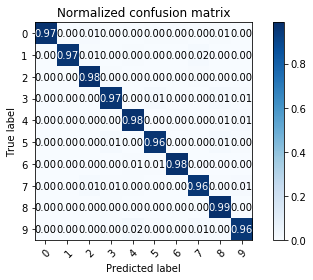

In [8]:
#plot results
# Plot normalized confusion matrix
plot_confusion_matrix(predicted, test_labels, classes=np.array([0,1,2,3,4,5,6,7,8,9]), normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [9]:
print("The accuracy of the model is {}".format(accuracy_score(predicted,test_labels)))

The accuracy of the model is 0.9717
